In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# 서울시 자치구 별 변수들간 상관관계 히트맵으로 그리기
# 범죄 데이터
crime = pd.read_csv('C:/Users/gherwt/KDT30/p1/crime.csv')
crime = crime.set_index('date')
crime

# 학생 데이터
students = pd.read_csv('C:/Users/gherwt/KDT30/p1/students.csv', encoding='cp949')
students = students.set_index('date')
students

# 만족도 데이터
life_satis = pd.read_csv('C:/Users/gherwt/KDT30/p1/life_satis.csv', encoding='cp949')
life_satis = life_satis.set_index('date')
life_satis

# 근로자 데이터
workers = pd.read_csv('C:/Users/gherwt/KDT30/p1/workers.csv', encoding='cp949')
workers = workers.set_index('date')
workers

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
date,,,,,,,,,,,,,,,,,,,,,
2015,620899,110257,49965,159416,87922,95743,171011,193193,85865,48226,...,134343,84319,236707,91754,312097,110384,60882,213778,327448,69130
2016,653752,112562,49973,166812,91740,100286,176834,197961,89746,49844,...,140528,88893,257154,94360,324236,113895,62888,224803,349357,70107
2017,656914,111749,50099,174441,88370,102681,183053,202727,90124,51130,...,145115,87606,269182,93195,329600,112496,65494,229015,343247,70483
2018,647150,117564,52739,196738,89397,102696,185065,204438,94073,52185,...,144694,84390,288118,95588,329921,117548,65489,228554,326357,72026
2019,659979,118539,53337,213203,89341,104329,187295,212942,95636,54968,...,151511,85905,302916,99707,335416,118803,66723,229364,327906,73409
2020,673758,115463,55017,223902,90186,104953,196896,220216,94846,54950,...,156497,88537,309630,99973,342961,120263,70474,226670,331944,74546
2021,673544,112214,52138,222168,87020,98781,193298,214539,90698,53169,...,156426,85784,323786,94518,338475,118112,70037,232132,315877,71573
2022,714756,117562,53850,237013,89755,99267,201757,219016,94903,53268,...,169078,87605,337626,96928,361219,116974,74971,227178,320861,72242


In [3]:
# 강남구 전세가 추출하기
gangnam_deposit_df = pd.read_csv("C:/Users/gherwt/KDT30/p1/gangnam.csv")
gangnam_deposit_df = gangnam_deposit_df[['지역코드',  '법정동', '지번', '층', '건축년도', '년', '월', '보증금액', '월세금액', '전용면적']]
# gangnam_deposit_df
# '지역코드',  '법정동', '지번', '층', '건축년도', '년', '월', '보증금액', '월세금액', '전용면적'
gangnam_deposit_df.rename(columns = {'지역코드' : 'area_code',
                              '법정동' : 'dong',
                              '지번' : 'jibun',
                              '층' : 'floor',
                              '건축년도' : 'build_year',
                              '년' : 'deal_y',
                              '월' : 'deal_m',
                              '보증금액' : 'deposit',
                              '월세금액' : 'm_rent',
                              '전용면적' : 'use_area'}, inplace = True)
gangnam_deposit_df['pyeong'] = gangnam_deposit_df['use_area'] / 3.3
# gangnam_deposit_df.head()

# 전용면적이 0인 행 삭제
gangnam_deposit_df = gangnam_deposit_df[gangnam_deposit_df['use_area'] != 0]

conversion_rate ={
    2015: 6.3,
    2016: 5.6,
    2017: 5,
    2018: 4.7,
    2019: 4.5,
    2020: 4.1,
    2021: 4,
    2022: 4
}
gangnam_deposit_df['jeonse'] = 0
for year, rate in conversion_rate.items():
    tmp = (gangnam_deposit_df['deal_y'] == year)  
    gangnam_deposit_df.loc[tmp, 'jeonse'] = gangnam_deposit_df.loc[tmp, 'deposit'] + (gangnam_deposit_df.loc[tmp, 'm_rent'] * 12 / (rate*0.01))
gangnam_deposit_df['pyeong_jeonse'] = gangnam_deposit_df['jeonse'] / gangnam_deposit_df['pyeong']
# gangnam_deposit_df.head(2)

# 강남구 연도별 평당 보증금 평균
gangnam_pyeong_deposit = gangnam_deposit_df.groupby('deal_y')['pyeong_jeonse'].mean()

C:\Users\gherwt\AppData\Local\Temp\ipykernel_13464\878711628.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[17238.0952381  13857.14285714 16000.         ... 15833.33333333
 25000.         45000.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gangnam_deposit_df.loc[tmp, 'jeonse'] = gangnam_deposit_df.loc[tmp, 'deposit'] + (gangnam_deposit_df.loc[tmp, 'm_rent'] * 12 / (rate*0.01))


In [4]:
# 강남구 데이터 프레임 만들기
gangnam_total = {'crime' : crime['강남구'],
               'students' : students['강남구'],
               'life_satis' : life_satis['강남구'],
               'workers' : workers['강남구'],
               'pyeong_deposit' : gangnam_pyeong_deposit}
gangnam_df = pd.DataFrame(gangnam_total, index = workers.index)

<Axes: title={'center': 'Gangnam_corr'}>

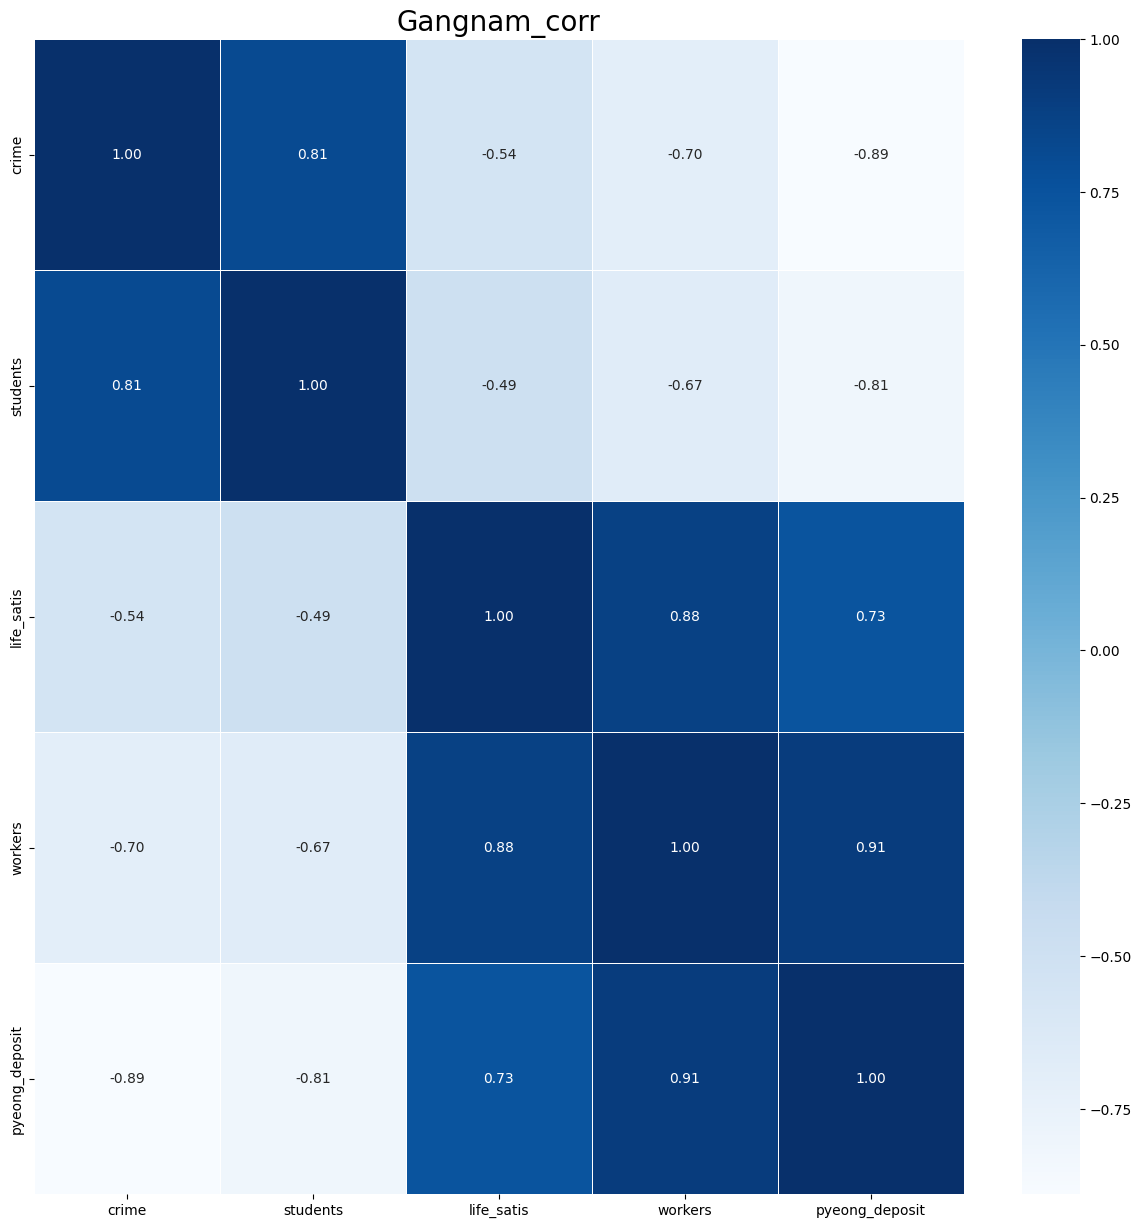

In [5]:
# 히트맵 그려서 상관관계 파악
plt.figure(figsize=(15,15))
plt.title('Gangnam_corr', fontsize=20)
sns.heatmap(data = gangnam_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [7]:
# 평당 보증금을 기준으로 변수의 상관관계 평균값을 구하기
corr_df = gangnam_df.corr().iloc[4]
corr_df = corr_df.abs()
corr_avg = (sum(corr_df) - 1)/4
corr_avg

0.8361391023568638